# Project 10 - Mapping Economic Data

In [19]:
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

In [20]:
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})

In [21]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    map_data = gpd.read_file(filename = filename,
                                  index_col = index_col)
    map_data.rename(columns = {"State":"state"},
                    inplace = True)
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data

In [22]:
fips_name = "fips_code"
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name= fips_name)

In [23]:
map_data["geometry"]

fips_code
21007    POLYGON ((-89.18137 37.04630, -89.17938 37.053...
21017    POLYGON ((-84.44266 38.28324, -84.44114 38.283...
21031    POLYGON ((-86.94486 37.07341, -86.94346 37.074...
21065    POLYGON ((-84.12662 37.64540, -84.12483 37.646...
21069    POLYGON ((-83.98428 38.44549, -83.98246 38.450...
                               ...                        
31073    POLYGON ((-100.09510 40.43866, -100.08937 40.4...
39075    POLYGON ((-82.22066 40.66758, -82.19327 40.667...
48171    POLYGON ((-99.30400 30.49983, -99.28234 30.499...
55079    POLYGON ((-88.06959 42.86726, -88.06959 42.872...
26139    POLYGON ((-86.26432 43.11830, -86.25103 43.118...
Name: geometry, Length: 3142, dtype: geometry

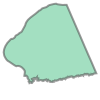

In [24]:
map_data["geometry"].loc[21007]

In [25]:
map_data[map_data["NAME"] == "Cass"]

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  NAME LSAD       ALAND  \
fips_code                                                                      
38017           38      017  01034226  0500000US38017  Cass   06  4571248512   
48067           48      067  01383819  0500000US48067  Cass   06  2426706492   
17017           17      017  00424210  0500000US17017  Cass   06   973191108   
27021           27      021  00659456  0500000US27021  Cass   06  5235592037   
18017           18      017  00450339  0500000US18017  Cass   06  1067476806   
26027           26      027  01622956  0500000US26027  Cass   06  1269367168   
19029           19      029  00465204  0500000US19029  Cass   06  1461422455   
29037           29      037  00758473  0500000US29037  Cass   06  1804223330   
31025           31      025  00835834  0500000US31025  Cass   06  1443537069   

               AWATER  Population         state  \
fips_code                                         
38017         7579105    181923.0  North Dakota   
48067        60517775     30026.0         Texas   
17017        20570537     12147.0      Illinois   
27021      1016632998     29779.0     Minnesota   
18017         6973611     37689.0       Indiana   
26027        47147839     51787.0      Michigan   
19029         1787165     12836.0          Iowa   
29037        14963262    105780.0      Missouri   
31025        22114716     26248.0      Nebraska   

                                                    geometry  
fips_code                                                     
38017      POLYGON ((-97.70618 46.99106, -97.70601 46.992...  
48067      POLYGON ((-94.65384 32.91704, -94.65367 32.954...  
17017      POLYGON ((-90.58176 39.87916, -90.57723 39.889...  
27021      POLYGON ((-94.78713 46.80394, -94.72310 46.804...  
18017      POLYGON ((-86.58162 40.75039, -86.58157 40.754...  
26027      POLYGON ((-86.22610 41.76002, -86.22581 41.774...  
19029      POLYGON ((-95.15557 41.21274, -95.15532 41.217...  
29037      POLYGON ((-94.61270 38.48315, -94.61273 38.484...  
31025      POLYGON ((-96.46386 41.01607, -96.44914 41.015...

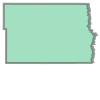

In [26]:
map_data["geometry"].loc[38017]

In [28]:
u_data = pd.read_csv(
    "countyUnemploymentData.csv", 
    encoding = "latin1", 
    parse_dates = True, 
    index_col="date")
u_data

C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\1102976848.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  u_data = pd.read_csv(


state_fips  county_fips                Location Labor Force  \
date                                                                      
2019-08-01           1            1       Autauga County AL      26,079   
2019-08-01           1            3       Baldwin County AL      97,939   
2019-08-01           1            5       Barbour County AL       8,652   
2019-08-01           1            7          Bibb County AL       8,670   
2019-08-01           1            9        Blount County AL      25,309   
...                ...          ...                     ...         ...   
2021-06-01          72          145  Vega Baja Municipio PR      12,993   
2021-06-01          72          147    Vieques Municipio PR       2,610   
2021-06-01          72          149   Villalba Municipio PR       6,940   
2021-06-01          72          151    Yabucoa Municipio PR       8,352   
2021-06-01          72          153      Yauco Municipio PR       9,212   

           Employed Unemployed Unemployment Rate  fips_code  
date                                                         
2019-08-01   25,368        711               2.7       1001  
2019-08-01   95,367      2,572               2.6       1003  
2019-08-01    8,322        330               3.8       1005  
2019-08-01    8,403        267               3.1       1007  
2019-08-01   24,641        668               2.6       1009  
...             ...        ...               ...        ...  
2021-06-01   11,580      1,413              10.9      72145  
2021-06-01    2,288        322              12.3      72147  
2021-06-01    6,152        788              11.4      72149  
2021-06-01    7,480        872              10.4      72151  
2021-06-01    8,127      1,085              10.4      72153  

[74037 rows x 8 columns]

In [29]:
u_data.dtypes

state_fips            int64
county_fips           int64
Location             object
Labor Force          object
Employed             object
Unemployed           object
Unemployment Rate    object
fips_code             int64
dtype: object

In [30]:
u_data.reset_index(inplace = True)
# index = u_data.dropna(subset = "fips_code", axis = 0).index
index = u_data["fips_code"].dropna(axis = 0).index
u_data = u_data.loc[index]
u_data

date  state_fips  county_fips                Location Labor Force  \
0     2019-08-01           1            1       Autauga County AL      26,079   
1     2019-08-01           1            3       Baldwin County AL      97,939   
2     2019-08-01           1            5       Barbour County AL       8,652   
3     2019-08-01           1            7          Bibb County AL       8,670   
4     2019-08-01           1            9        Blount County AL      25,309   
...          ...         ...          ...                     ...         ...   
74032 2021-06-01          72          145  Vega Baja Municipio PR      12,993   
74033 2021-06-01          72          147    Vieques Municipio PR       2,610   
74034 2021-06-01          72          149   Villalba Municipio PR       6,940   
74035 2021-06-01          72          151    Yabucoa Municipio PR       8,352   
74036 2021-06-01          72          153      Yauco Municipio PR       9,212   

      Employed Unemployed Unemployment Rate  fips_code  
0       25,368        711               2.7       1001  
1       95,367      2,572               2.6       1003  
2        8,322        330               3.8       1005  
3        8,403        267               3.1       1007  
4       24,641        668               2.6       1009  
...        ...        ...               ...        ...  
74032   11,580      1,413              10.9      72145  
74033    2,288        322              12.3      72147  
74034    6,152        788              11.4      72149  
74035    7,480        872              10.4      72151  
74036    8,127      1,085              10.4      72153  

[74037 rows x 9 columns]

In [31]:
u_data["fips_code"] = u_data["fips_code"].astype(int)
u_data.set_index(["fips_code", "date"], inplace = True)
u_data = u_data[list(u_data.keys())[-4:]]
u_data

Labor Force Employed Unemployed Unemployment Rate
fips_code date                                                        
1001      2019-08-01      26,079   25,368        711               2.7
1003      2019-08-01      97,939   95,367      2,572               2.6
1005      2019-08-01       8,652    8,322        330               3.8
1007      2019-08-01       8,670    8,403        267               3.1
1009      2019-08-01      25,309   24,641        668               2.6
...                          ...      ...        ...               ...
72145     2021-06-01      12,993   11,580      1,413              10.9
72147     2021-06-01       2,610    2,288        322              12.3
72149     2021-06-01       6,940    6,152        788              11.4
72151     2021-06-01       8,352    7,480        872              10.4
72153     2021-06-01       9,212    8,127      1,085              10.4

[74037 rows x 4 columns]

## Combine U_Data and Map_data

In [32]:
import copy as copy

def create_merged_geo_dataframe(data, map_data, dates):
    matching_gpd = {}
    # gathered fips_code from index, remove duplicates because of panel df
    counties = data.index.get_level_values("fips_code").unique()
    # go through each column in the panda dataframe
    for key, val in data.items():
        # save a copyp of the map-data (df) for each key
        # keys will be labor force, unemployment rate, etc...
        matching_gpd[key] = copy.copy(map_data[map_data.index.isin(counties)])
        # add each date for the key from the panel with the date as the column name
        for date in dates:
            val_slice = val[val.index.get_level_values("date") == date]
            val_slice = val_slice.reset_index(drop = False).set_index("fips_code")
            matching_gpd[key][date] = val_slice[key]
    return matching_gpd
dates = u_data.index.get_level_values("date").unique()
u = create_merged_geo_dataframe(u_data, map_data, dates)
u

{'Labor Force':            STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD  \
 fips_code                                                               
 21007           21      007  00516850  0500000US21007    Ballard   06   
 21017           21      017  00516855  0500000US21017    Bourbon   06   
 21031           21      031  00516862  0500000US21031     Butler   06   
 21065           21      065  00516879  0500000US21065     Estill   06   
 21069           21      069  00516881  0500000US21069    Fleming   06   
 ...            ...      ...       ...             ...        ...  ...   
 31073           31      073  00835858  0500000US31073     Gosper   06   
 39075           39      075  01074050  0500000US39075     Holmes   06   
 48171           48      171  01383871  0500000US48171  Gillespie   06   
 55079           55      079  01581100  0500000US55079  Milwaukee   06   
 26139           26      139  01623012  0500000US26139     Ottawa   06   
 
                 ALAN

In [33]:
u["Labor Force"]

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD  \
fips_code                                                               
21007           21      007  00516850  0500000US21007    Ballard   06   
21017           21      017  00516855  0500000US21017    Bourbon   06   
21031           21      031  00516862  0500000US21031     Butler   06   
21065           21      065  00516879  0500000US21065     Estill   06   
21069           21      069  00516881  0500000US21069    Fleming   06   
...            ...      ...       ...             ...        ...  ...   
31073           31      073  00835858  0500000US31073     Gosper   06   
39075           39      075  01074050  0500000US39075     Holmes   06   
48171           48      171  01383871  0500000US48171  Gillespie   06   
55079           55      079  01581100  0500000US55079  Milwaukee   06   
26139           26      139  01623012  0500000US26139     Ottawa   06   

                ALAND      AWATER  Population      state  ...  \
fips_code                                                 ...   
21007       639387454    69473325      7888.0   Kentucky  ...   
21017       750439351     4829777     19788.0   Kentucky  ...   
21031      1103571974    13943044     12879.0   Kentucky  ...   
21065       655509930     6516335     14106.0   Kentucky  ...   
21069       902727151     7182793     14581.0   Kentucky  ...   
...               ...         ...         ...        ...  ...   
31073      1186616237    11831826      1990.0   Nebraska  ...   
39075      1094405866     3695230     43960.0       Ohio  ...   
48171      2740719114     9012764     26988.0      Texas  ...   
55079       625440563  2455383635    945726.0  Wisconsin  ...   
26139      1459502408  2765830983    291830.0   Michigan  ...   

          2020-09-01 00:00:00 2020-10-01 00:00:00 2020-11-01 00:00:00  \
fips_code                                                               
21007                   3,317               3,254               3,285   
21017                   9,202               9,598               9,643   
21031                   4,856               4,897               4,959   
21065                   5,018               5,032               5,002   
21069                   5,921               6,024               6,061   
...                       ...                 ...                 ...   
31073                   1,088               1,080               1,071   
39075                  21,290              21,342              20,985   
48171                  13,257              13,504              13,406   
55079                 477,229             463,115             460,330   
26139                 157,509             157,425             158,760   

          2020-12-01 00:00:00 2021-01-01 00:00:00 2021-02-01 00:00:00  \
fips_code                                                               
21007                   3,281               3,234               3,221   
21017                   9,488               9,472               9,191   
21031                   4,903               4,895               4,940   
21065                   4,991               4,928               4,961   
21069                   6,095               5,920               5,822   
...                       ...                 ...                 ...   
31073                   1,057               1,075               1,069   
39075                  20,977              20,601              20,745   
48171                  13,617              13,285              13,372   
55079                 453,165             451,611             456,943   
26139                 158,238             155,818             155,588   

          2021-03-01 00:00:00 2021-04-01 00:00:00 2021-05-01 00:00:00  \
fips_code                                                               
21007                   3,247               3,220               3,236   
21017                   9,207               9,107               9,503   
21031                  

In [34]:
u_data = u 
for key in u_data.keys():
    if u_data[key][dates[0]].dtypes == object:
        for date in dates:
            u_data[key][date] = pd.to_numeric(u_data[key][date], errors = "coerce")

In [35]:
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

In [36]:
u_data = u 
for key, val in u_data.items():
    df = val
    minx = df.bounds["minx"].min()
    miny = df.bounds["miny"].min()
    maxy = df.bounds["maxy"].max()
    maxx = -58
    
    bounded_data = select_data_within_bounds(df, minx, miny, maxx, maxy)
    u_data[key] = bounded_data

In [37]:
key = "Unemployment Rate"
df = u_data[key]

C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\4157290431.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Reds", 8)
C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\4157290431.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Reds", 8)
C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\4157290431.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Reds", 8)
C:\Users\aleah\AppData\Local\Temp\ipykernel_23456

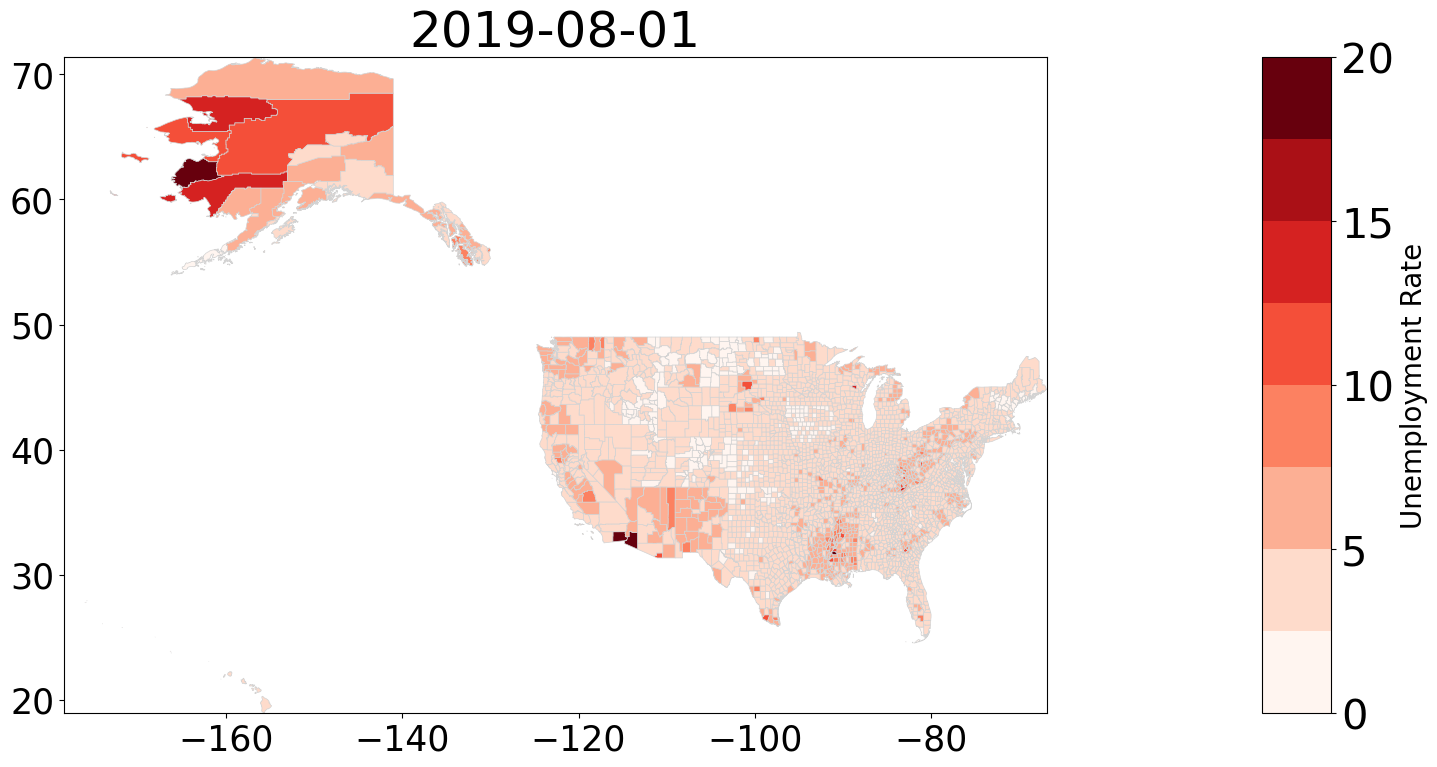

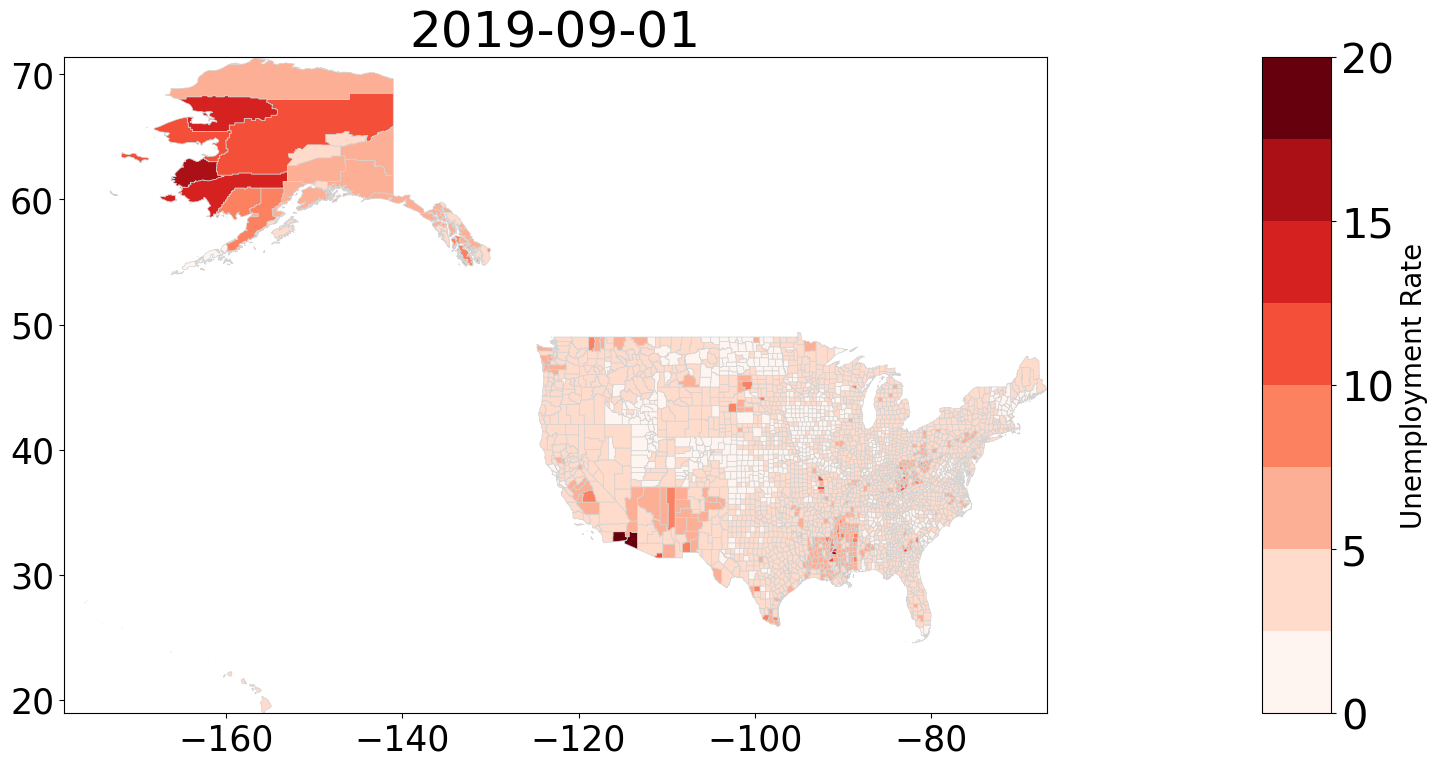

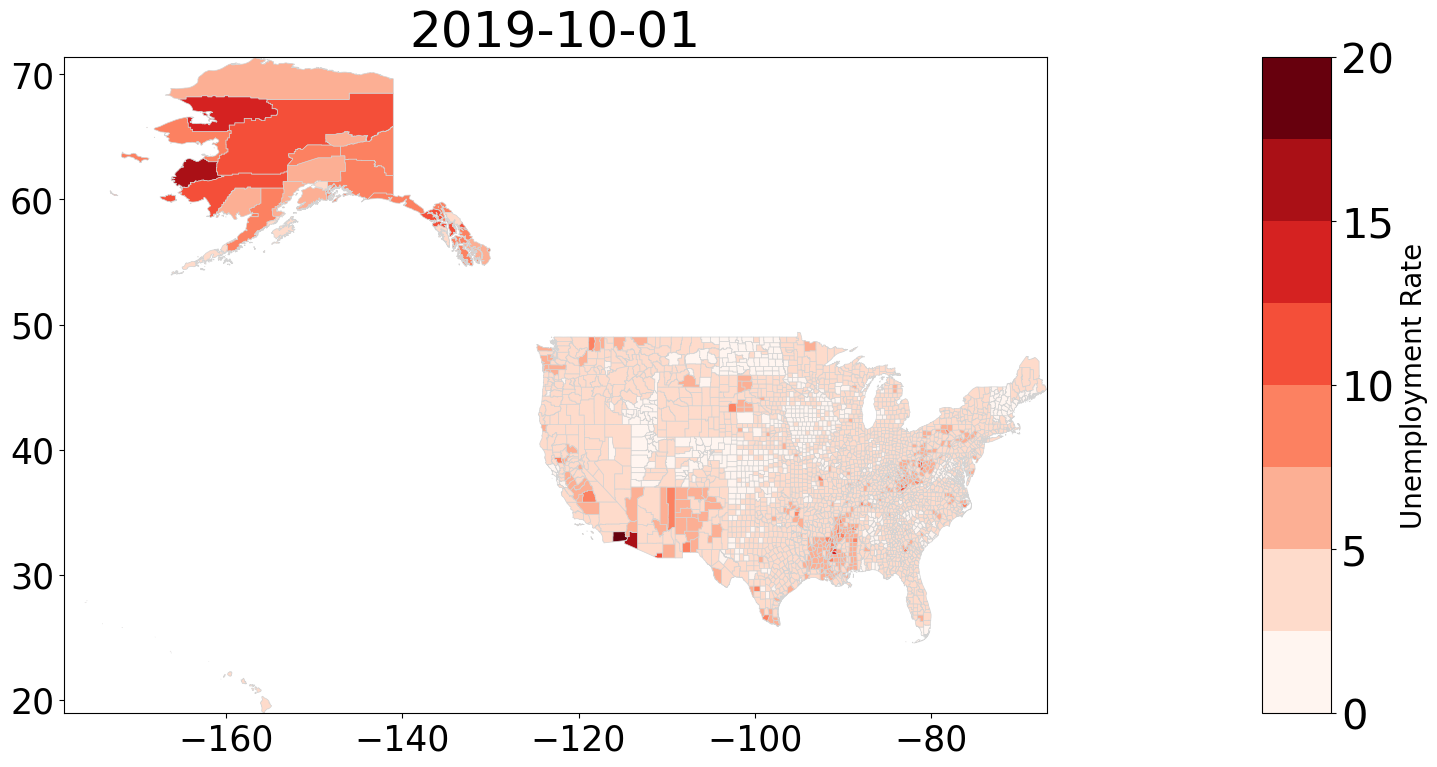

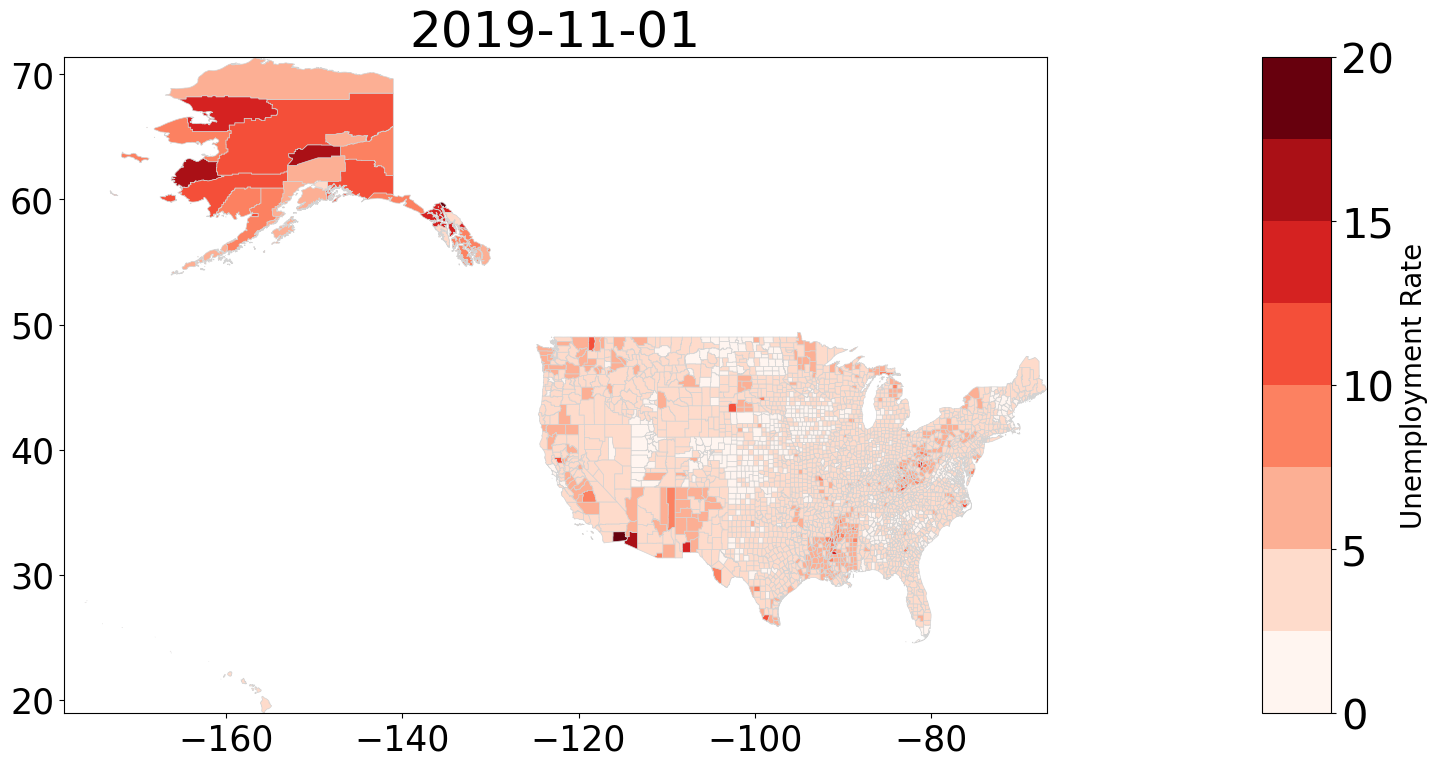

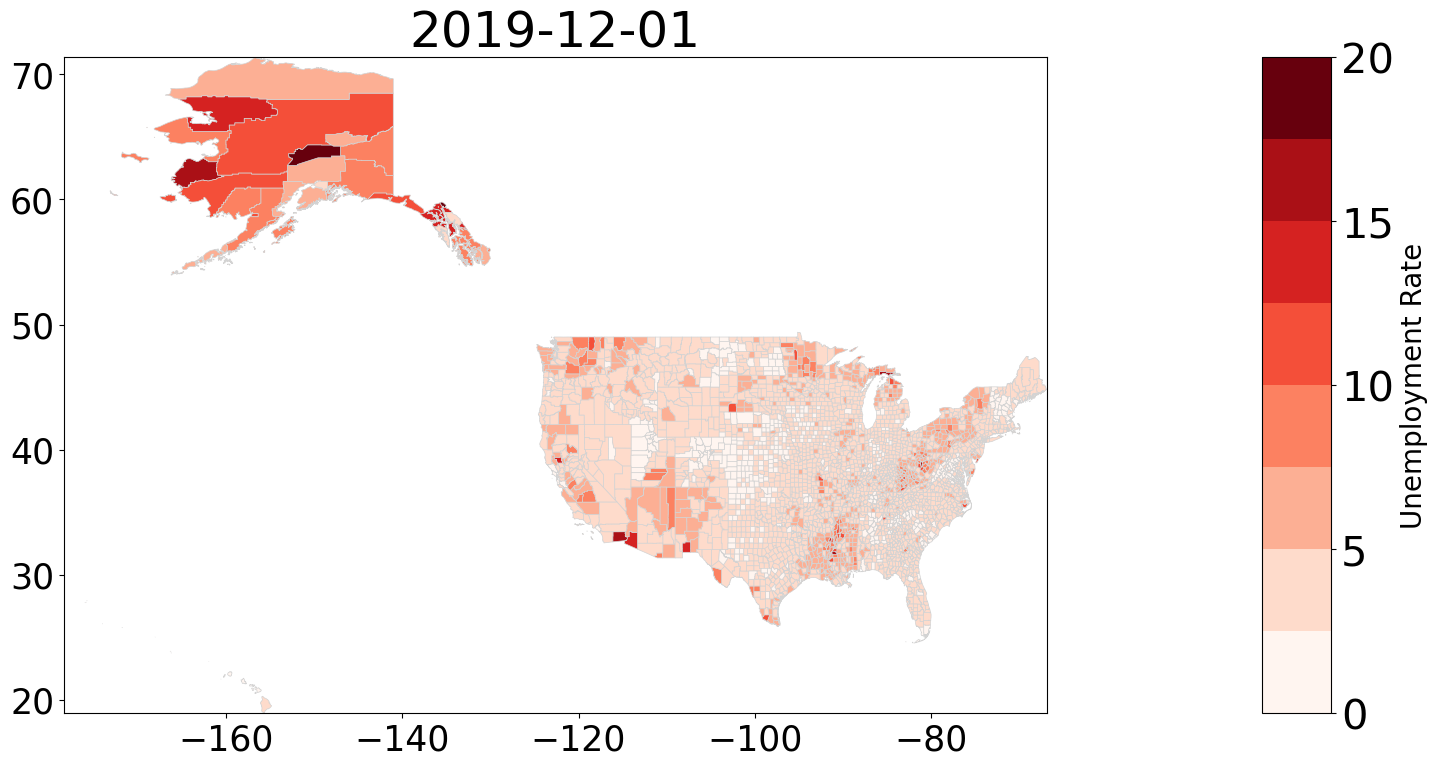

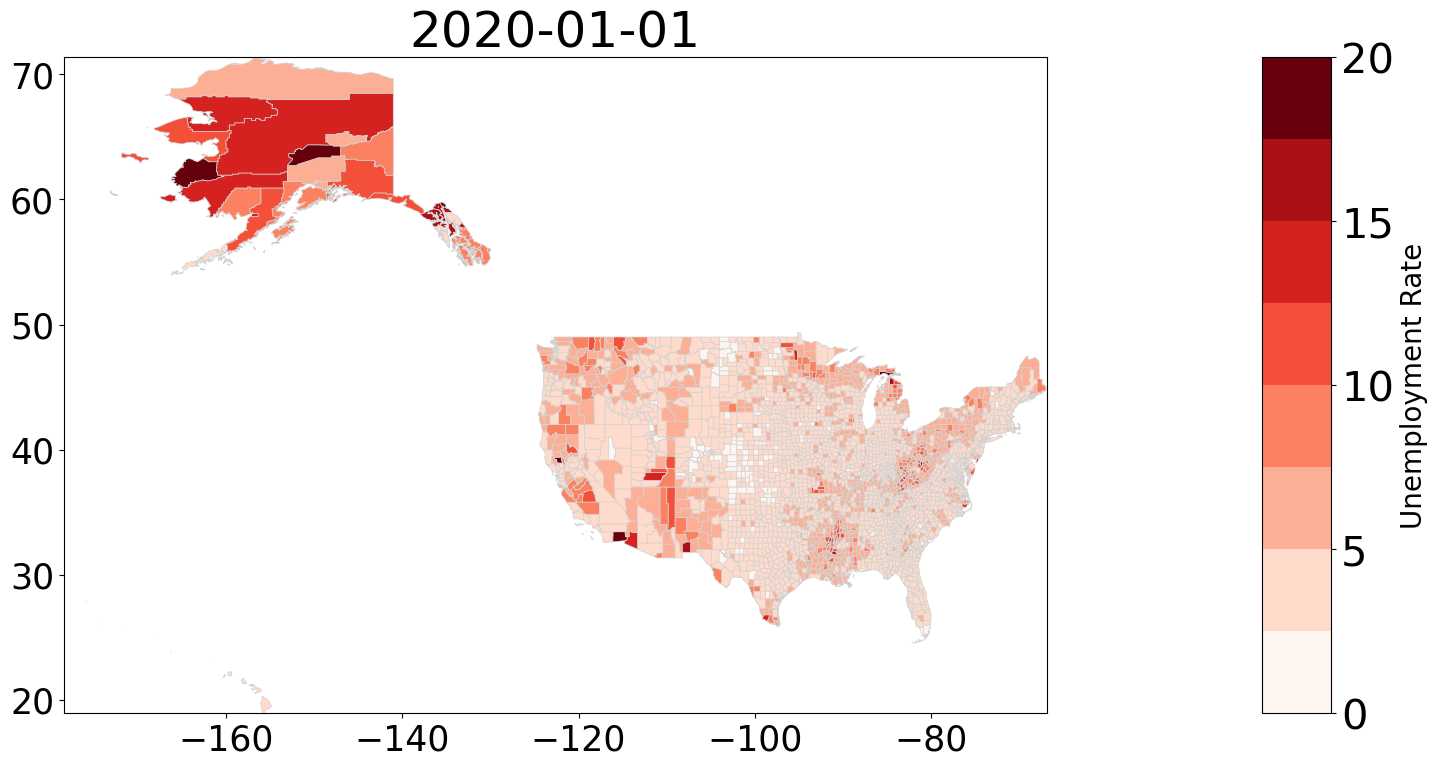

In [38]:
for date in dates[:6]:
    fig, ax =plt.subplots(figsize =(19,9),
                         subplot_kw = {"aspect":"equal"})
    plt.rcParams.update({"font.size":30})
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    vmin = 0
    vmax = 20
    cmap = cm.get_cmap("Reds", 8)
    norm = cm.colors.Normalize(vmin = vmin, vmax = vmax)
    sm = cm.ScalarMappable(cmap = cmap, norm = norm)
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", size = size, pad = .1)
    cbar = fig.colorbar(sm, cax = cax, cmap = cmap)
    # cbar.ax.tick_params(labelsize = 18)
    # vals = list(cbar.ax.get_yticks())
    # cbar.ax.set_yticklabels(vals)
    cbar.ax.set_ylabel(key, fontsize =20)
    
    df.plot(column = date,
            norm = norm,
            cmap = cmap,
            edgecolor = "lightgrey",
            linewidth = .5,
            ax = ax,
            cax = ax)
    ax.set_title(str(date)[:10])


In [39]:
df[dates[1]].astype(float)

fips_code
21007    4.6
21017    3.5
21031    3.9
21065    4.3
21069    4.6
        ... 
31073    2.8
39075    3.0
48171    2.4
55079    3.8
26139    2.5
Name: 2019-09-01 00:00:00, Length: 3140, dtype: float64

In [40]:
key = "Unemployment Rate"
new_key = "Normalized " + key + " (Feb 2020)"
feb2020 =dates[6]
u_data[new_key] = u_data[key].copy()
for date in dates:
    u_data[new_key][date] = u_data[key][date].sub(
        u_data[key][feb2020])
u_data[new_key].tail()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD  \
fips_code                                                               
31073           31      073  00835858  0500000US31073     Gosper   06   
39075           39      075  01074050  0500000US39075     Holmes   06   
48171           48      171  01383871  0500000US48171  Gillespie   06   
55079           55      079  01581100  0500000US55079  Milwaukee   06   
26139           26      139  01623012  0500000US26139     Ottawa   06   

                ALAND      AWATER  Population      state  ...  \
fips_code                                                 ...   
31073      1186616237    11831826      1990.0   Nebraska  ...   
39075      1094405866     3695230     43960.0       Ohio  ...   
48171      2740719114     9012764     26988.0      Texas  ...   
55079       625440563  2455383635    945726.0  Wisconsin  ...   
26139      1459502408  2765830983    291830.0   Michigan  ...   

          2020-09-01 00:00:00  2020-10-01 00:00:00  2020-11-01 00:00:00  \
fips_code                                                                 
31073                    -0.1                 -0.2                 -0.3   
39075                    -0.1                 -1.3                 -1.2   
48171                     1.9                  1.3                  1.3   
55079                     3.4                  2.4                  1.8   
26139                     2.3                  1.8                  2.1   

           2020-12-01 00:00:00  2021-01-01 00:00:00  2021-02-01 00:00:00  \
fips_code                                                                  
31073                     -0.6                 -0.4                 -0.1   
39075                     -0.7                 -0.2                 -0.2   
48171                      1.2                  1.8                  1.8   
55079                      1.3                  1.6                  1.9   
26139                      2.8                  2.5                  1.9   

           2021-03-01 00:00:00  2021-04-01 00:00:00  2021-05-01 00:00:00  \
fips_code                                                                  
31073                     -0.3                 -0.4                 -0.3   
39075                     -0.9                 -1.2                 -0.7   
48171                      1.7                  1.1                  1.1   
55079                      2.0                  2.1                  1.6   
26139                      2.0                  1.4                  2.0   

           2021-06-01 00:00:00  
fips_code                       
31073                     -0.2  
39075                      0.5  
48171                      1.5  
55079                      2.4  
26139                      2.0  

[5 rows x 34 columns]

2020-01-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2958593282.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2958593282.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


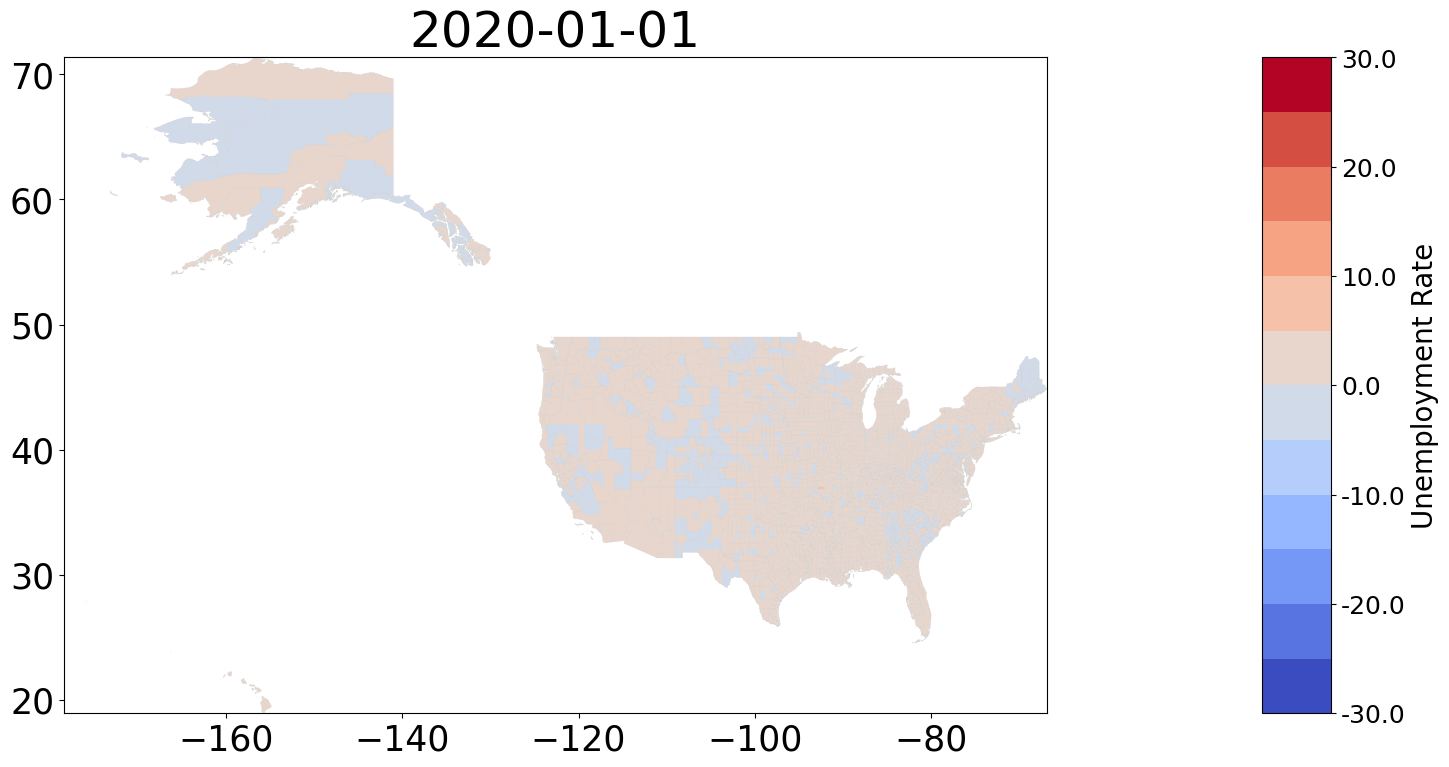

2020-02-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2958593282.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2958593282.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


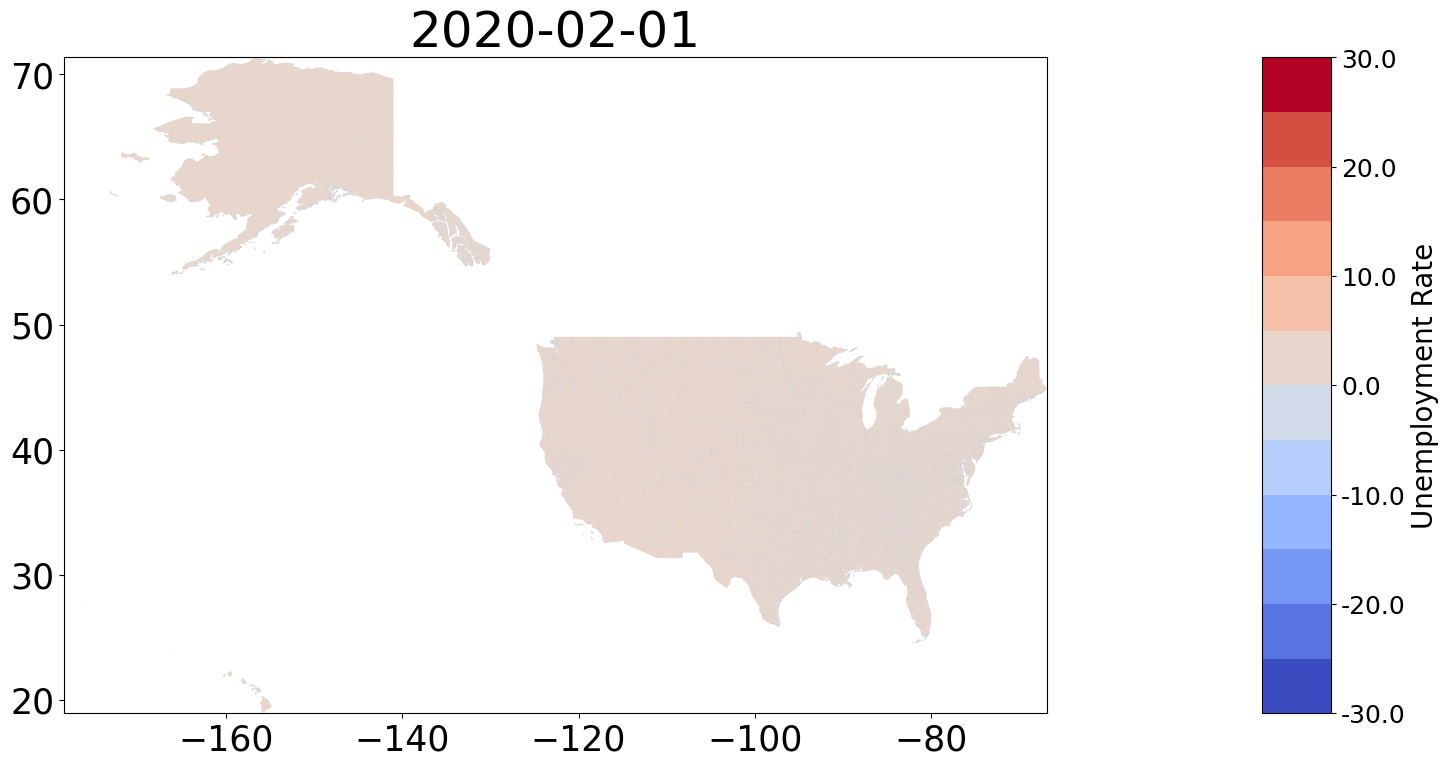

2020-03-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2958593282.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2958593282.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


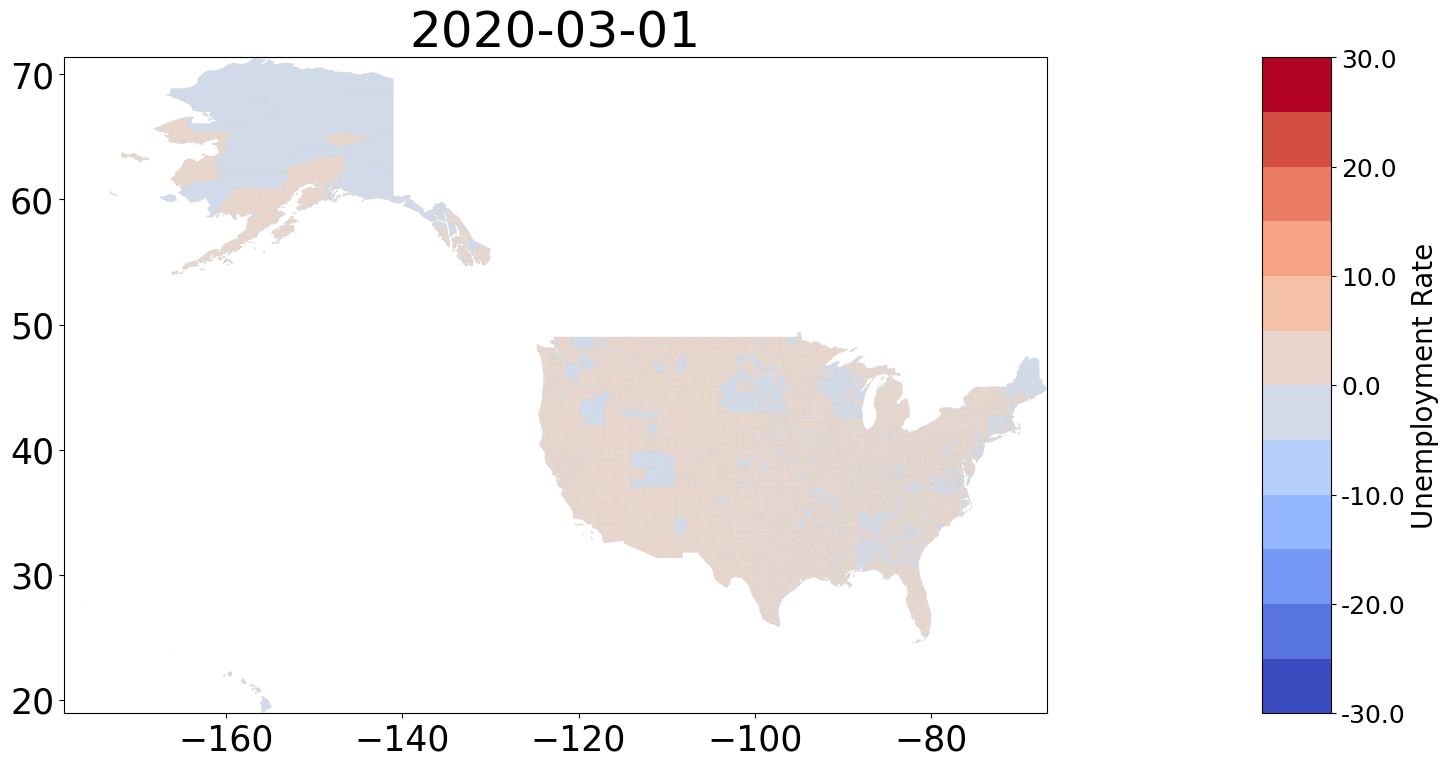

2020-04-01 00:00:00


C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2958593282.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap, ndiv)
C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2958593282.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])


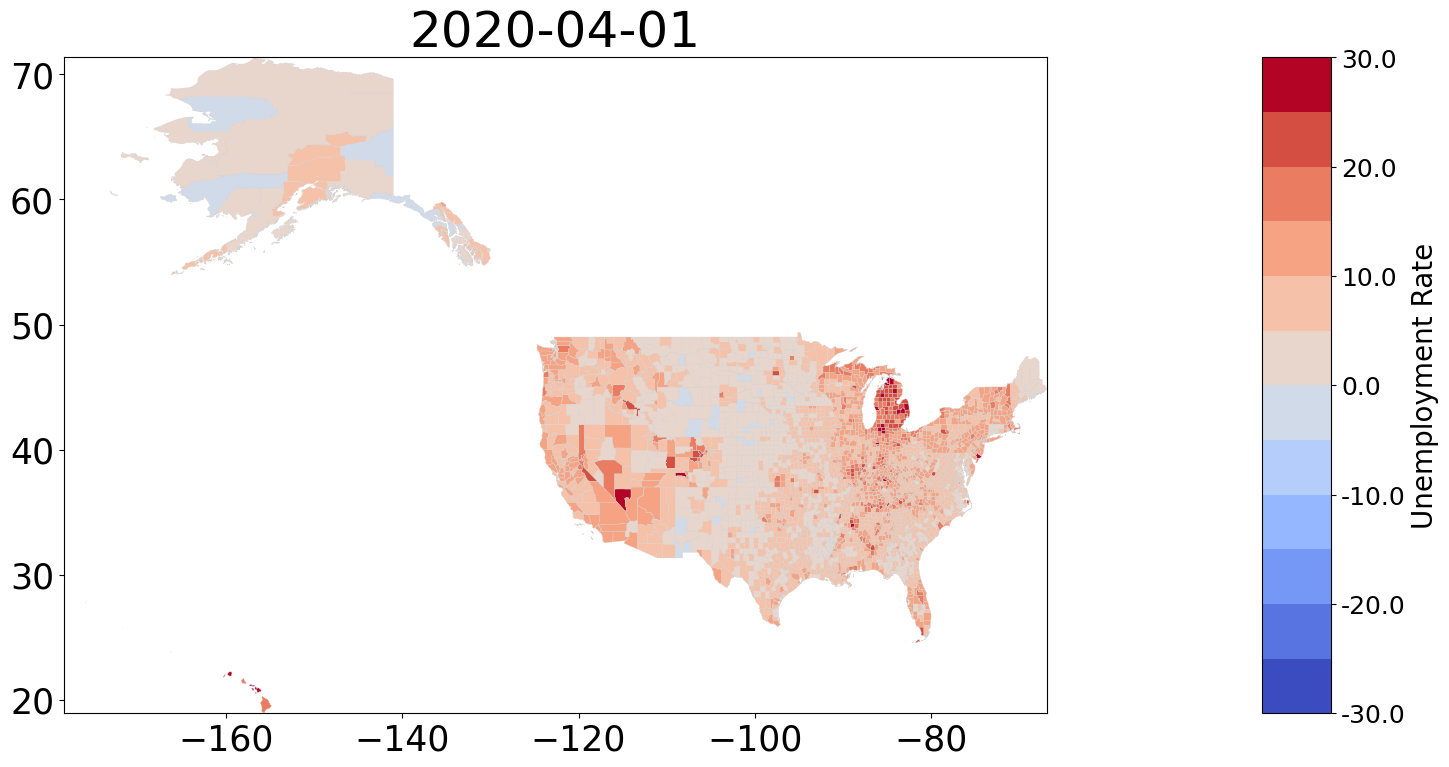

In [41]:
def plot_date_data(df, date, cmap = "Reds", ndiv = 8, vmin = 0, vmax = 20,
                   pp = None, show_fig = True):
    print(date)
    fig, ax = plt.subplots(figsize=(19,9),
                          subplot_kw = {"aspect":"equal"})
    plt.rcParams.update({"font.size": 30})

    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    cmap = cm.get_cmap(cmap, ndiv)
    norm = cm.colors.Normalize(vmin=vmin, vmax=vmax)
    ### add colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", size = size, pad = .1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize=20)

    df.plot(ax=ax, cax=ax, column = date,
            vmin=vmin, vmax=vmax,
            cmap=cmap, legend=False, 
            linewidth = .25, edgecolor="lightgrey",norm=norm)
    ax.set_title(str(date)[:10])
    
    if show_fig:
        plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches = "tight")
    plt.close()

pp = PdfPages("County Unemployment Normalized.pdf")
for date in dates[5:9]:
    plot_date_data(u_data[new_key], date = date, cmap = "coolwarm", ndiv = 12,
                   vmin = -30, vmax = 30, pp = pp,
                   show_fig = True)
pp.close()

In [42]:
u_data[new_key][dates[0:7]]

2019-08-01 00:00:00  2019-09-01 00:00:00  2019-10-01 00:00:00  \
fips_code                                                                  
21007                     -0.5                 -1.2                 -1.3   
21017                     -0.5                 -0.5                 -0.6   
21031                     -0.7                 -1.4                 -1.1   
21065                     -1.2                 -1.4                 -1.1   
21069                     -1.2                 -1.8                 -1.7   
...                        ...                  ...                  ...   
31073                      0.3                  0.7                  0.5   
39075                     -0.2                 -0.3                 -0.4   
48171                     -0.1                 -0.2                 -0.4   
55079                      0.1                 -0.5                 -0.7   
26139                      0.5                  0.2                 -0.1   

           2019-11-01 00:00:00  2019-12-01 00:00:00  2020-01-01 00:00:00  \
fips_code                                                                  
21007                     -1.2                 -0.3                  0.6   
21017                     -0.6                 -0.5                  0.4   
21031                     -1.1                 -1.0                  0.5   
21065                     -1.1                 -0.8                  0.4   
21069                     -1.8                 -1.3                 -0.1   
...                        ...                  ...                  ...   
31073                      0.2                  0.1                  0.0   
39075                     -0.6                 -0.5                  0.6   
48171                     -0.3                 -0.5                  0.0   
55079                     -0.5                 -0.7                  0.2   
26139                     -0.1                  0.0                  0.4   

           2020-02-01 00:00:00  
fips_code                       
21007                      0.0  
21017                      0.0  
21031                      0.0  
21065                      0.0  
21069                      0.0  
...                        ...  
31073                      0.0  
39075                      0.0  
48171                      0.0  
55079                      0.0  
26139                      0.0  

[3140 rows x 7 columns]

In [43]:
import plotly.express as px
plot_df = u_data[new_key].copy()
date_type = type(plot_df.keys()[-1])
# use if statement to only change datetime to string
plot_df.rename(columns = {name:str(name)[:7] for name in plot_df.keys() if type(name) == date_type}, inplace = True)

plot_df["geometry"]

fips_code
21007    POLYGON ((-89.18137 37.04630, -89.17938 37.053...
21017    POLYGON ((-84.44266 38.28324, -84.44114 38.283...
21031    POLYGON ((-86.94486 37.07341, -86.94346 37.074...
21065    POLYGON ((-84.12662 37.64540, -84.12483 37.646...
21069    POLYGON ((-83.98428 38.44549, -83.98246 38.450...
                               ...                        
31073    POLYGON ((-100.09510 40.43866, -100.08937 40.4...
39075    POLYGON ((-82.22066 40.66758, -82.19327 40.667...
48171    POLYGON ((-99.30400 30.49983, -99.28234 30.499...
55079    POLYGON ((-88.06959 42.86726, -88.06959 42.872...
26139    POLYGON ((-86.26432 43.11830, -86.25103 43.118...
Name: geometry, Length: 3140, dtype: geometry

In [44]:
cname = str(list(plot_df.keys())[-1])            
plot_df[cname] = plot_df[cname].round(2)
hover_name = "NAME"
title = new_key[:-1] + " = 0)"
fig = px.choropleth_mapbox(plot_df.reset_index(),
                           geojson = plot_df,
#featureidkey = "fips_code",
                           locations = 'fips_code',
                           hover_name=hover_name,
                           hover_data = [cname],
                           color=cname, 
#animation_frame="Variable Name",
                           color_continuous_scale="ylgnbu",
                           center={'lat':df["geometry"].centroid.y.mean(), 
                                   'lon':df["geometry"].centroid.x.mean()},
                            zoom = 5,
                            opacity=.6,
#range_color=(plot_df[cname].min(), plot_df[cname].max()),
                           title= title,
                           mapbox_style="carto-positron",
                           height=900,
#labels={cname:'U Change:' + cname  }
)
# fig.show()
fig.write_html(new_key+".html")

C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2936522887.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center={'lat':df["geometry"].centroid.y.mean(),
C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2936522887.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  'lon':df["geometry"].centroid.x.mean()},


## Mapping Economic Freedom and Economic Performance

In [47]:
world = gpd.read_file(gpd.datasets.get_path(
    'naturalearth_lowres')).to_crs(epsg=4326)
cities = gpd.read_file(gpd.datasets.get_path(
    'naturalearth_cities')).to_crs(epsg=4326)
EFW = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = ["ISO_Code_3","Year"],
                  parse_dates = True).rename(columns = {"Summary":"EFW"})

C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\317551249.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\317551249.py:3: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [48]:
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [49]:
cities

name                     geometry
0      Vatican City    POINT (12.45339 41.90328)
1        San Marino    POINT (12.44177 43.93610)
2             Vaduz     POINT (9.51667 47.13372)
3           Lobamba   POINT (31.20000 -26.46667)
4        Luxembourg     POINT (6.13000 49.61166)
..              ...                          ...
238  Rio de Janeiro  POINT (-43.21212 -22.90731)
239       São Paulo  POINT (-46.62697 -23.55673)
240          Sydney  POINT (151.21255 -33.87137)
241       Singapore    POINT (103.85387 1.29498)
242       Hong Kong   POINT (114.18306 22.30693)

[243 rows x 2 columns]

In [50]:
EFW

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        1970-01-01         AO  Sub-Saharan Africa   
           1975-01-01         AO  Sub-Saharan Africa   
           1980-01-01         AO  Sub-Saharan Africa   
           1985-01-01         AO  Sub-Saharan Africa   
           1990-01-01         AO  Sub-Saharan Africa   
...                          ...                 ...   
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        1970-01-01                                                NaN                                                                                     
           1975-01-01                                                NaN                                                                                     
           1980-01-01                                                NaN                                                                                     
           1985-01-01                                                NaN                                                                                     
           1990-01-01                                                 LM                                                                                     
...                                                                  ...                                                                                     
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries       EFW  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1975-01-01    Angola       NaN                 NaN   
           1980-01-01    Angola       NaN                 NaN   
           1985-01-01    Angola       NaN                 NaN   
           1990-01-01    Angola       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1975-01-01                               NaN          NaN   
           1980-01-01                               NaN          NaN   
           1985-01-01           

In [51]:
world.set_index("iso_a3", inplace = True)
world

pop_est      continent                      name  gdp_md_est  \
iso_a3                                                                     
FJI        889953.0        Oceania                      Fiji        5496   
TZA      58005463.0         Africa                  Tanzania       63177   
ESH        603253.0         Africa                 W. Sahara         907   
CAN      37589262.0  North America                    Canada     1736425   
USA     328239523.0  North America  United States of America    21433226   
...             ...            ...                       ...         ...   
SRB       6944975.0         Europe                    Serbia       51475   
MNE        622137.0         Europe                Montenegro        5542   
-99       1794248.0         Europe                    Kosovo        7926   
TTO       1394973.0  North America       Trinidad and Tobago       24269   
SSD      11062113.0         Africa                  S. Sudan       11998   

                                                 geometry  
iso_a3                                                     
FJI     MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
TZA     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
ESH     POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
CAN     MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
USA     MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
...                                                   ...  
SRB     POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
MNE     POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
-99     POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
TTO     POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
SSD     POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 5 columns]

In [52]:
for key in ["RGDP Per Capita", "EFW"]:
    for year in ["2016", "2018","2020"]:
        world[key + " " + year] = EFW[
            EFW.index.get_level_values("Year") == year].reset_index().set_index("ISO_Code_3")[key]
        world[key + " " + year + " Rank"] = EFW[
            EFW.index.get_level_values("Year") == year].reset_index().set_index("ISO_Code_3")[key].rank(ascending = False)     
world.tail()

pop_est      continent                 name  gdp_md_est  \
iso_a3                                                               
SRB      6944975.0         Europe               Serbia       51475   
MNE       622137.0         Europe           Montenegro        5542   
-99      1794248.0         Europe               Kosovo        7926   
TTO      1394973.0  North America  Trinidad and Tobago       24269   
SSD     11062113.0         Africa             S. Sudan       11998   

                                                 geometry  \
iso_a3                                                      
SRB     POLYGON ((18.82982 45.90887, 18.82984 45.90888...   
MNE     POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
-99     POLYGON ((20.59025 41.85541, 20.52295 42.21787...   
TTO     POLYGON ((-61.68000 10.76000, -61.10500 10.890...   
SSD     POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...   

        RGDP Per Capita 2016  RGDP Per Capita 2016 Rank  RGDP Per Capita 2018  \
iso_a3                                                                          
SRB                  13184.0                       74.0            14124.1177   
MNE                  17741.0                       59.0            19504.1588   
-99                      NaN                        NaN                   NaN   
TTO                  29178.0                       34.0            28549.4083   
SSD                      NaN                        NaN                   NaN   

        RGDP Per Capita 2018 Rank  RGDP Per Capita 2020  \
iso_a3                                                    
SRB                          71.0                   NaN   
MNE                          56.0                   NaN   
-99                           NaN                   NaN   
TTO                          37.0                   NaN   
SSD                           NaN                   NaN   

        RGDP Per Capita 2020 Rank  EFW 2016  EFW 2016 Rank  EFW 2018  \
iso_a3                                                                 
SRB                           NaN  6.989751           83.0  7.129546   
MNE                           NaN  7.310201           59.0  7.450013   
-99                           NaN       NaN            NaN       NaN   
TTO                           NaN  7.189744           69.0  7.259644   
SSD                           NaN       NaN            NaN       NaN   

        EFW 2018 Rank  EFW 2020  EFW 2020 Rank  
iso_a3                                          
SRB              77.0      6.82           84.0  
MNE              56.0      7.46           40.0  
-99               NaN       NaN            NaN  
TTO              68.0      7.01           73.0  
SSD               NaN       NaN            NaN

In [53]:
#only include cities whose countries are represented in the world df
cities["Country"] = ""
for ix in cities.index:
    try:
        cities.loc[ix, "Country"] = world[
#check if city is in country
            world["geometry"].contains(cities.loc[ix]["geometry"])\
#if city is in country, use index which is iso code
        ].index[0]
    except:
        continue
cities

name                     geometry Country
0      Vatican City    POINT (12.45339 41.90328)     ITA
1        San Marino    POINT (12.44177 43.93610)     ITA
2             Vaduz     POINT (9.51667 47.13372)     AUT
3           Lobamba   POINT (31.20000 -26.46667)     SWZ
4        Luxembourg     POINT (6.13000 49.61166)     LUX
..              ...                          ...     ...
238  Rio de Janeiro  POINT (-43.21212 -22.90731)     BRA
239       São Paulo  POINT (-46.62697 -23.55673)     BRA
240          Sydney  POINT (151.21255 -33.87137)     AUS
241       Singapore    POINT (103.85387 1.29498)     MYS
242       Hong Kong   POINT (114.18306 22.30693)     CHN

[243 rows x 3 columns]

C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2010425905.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\aleah\AppData\Local\Temp\ipykernel_23456\2010425905.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




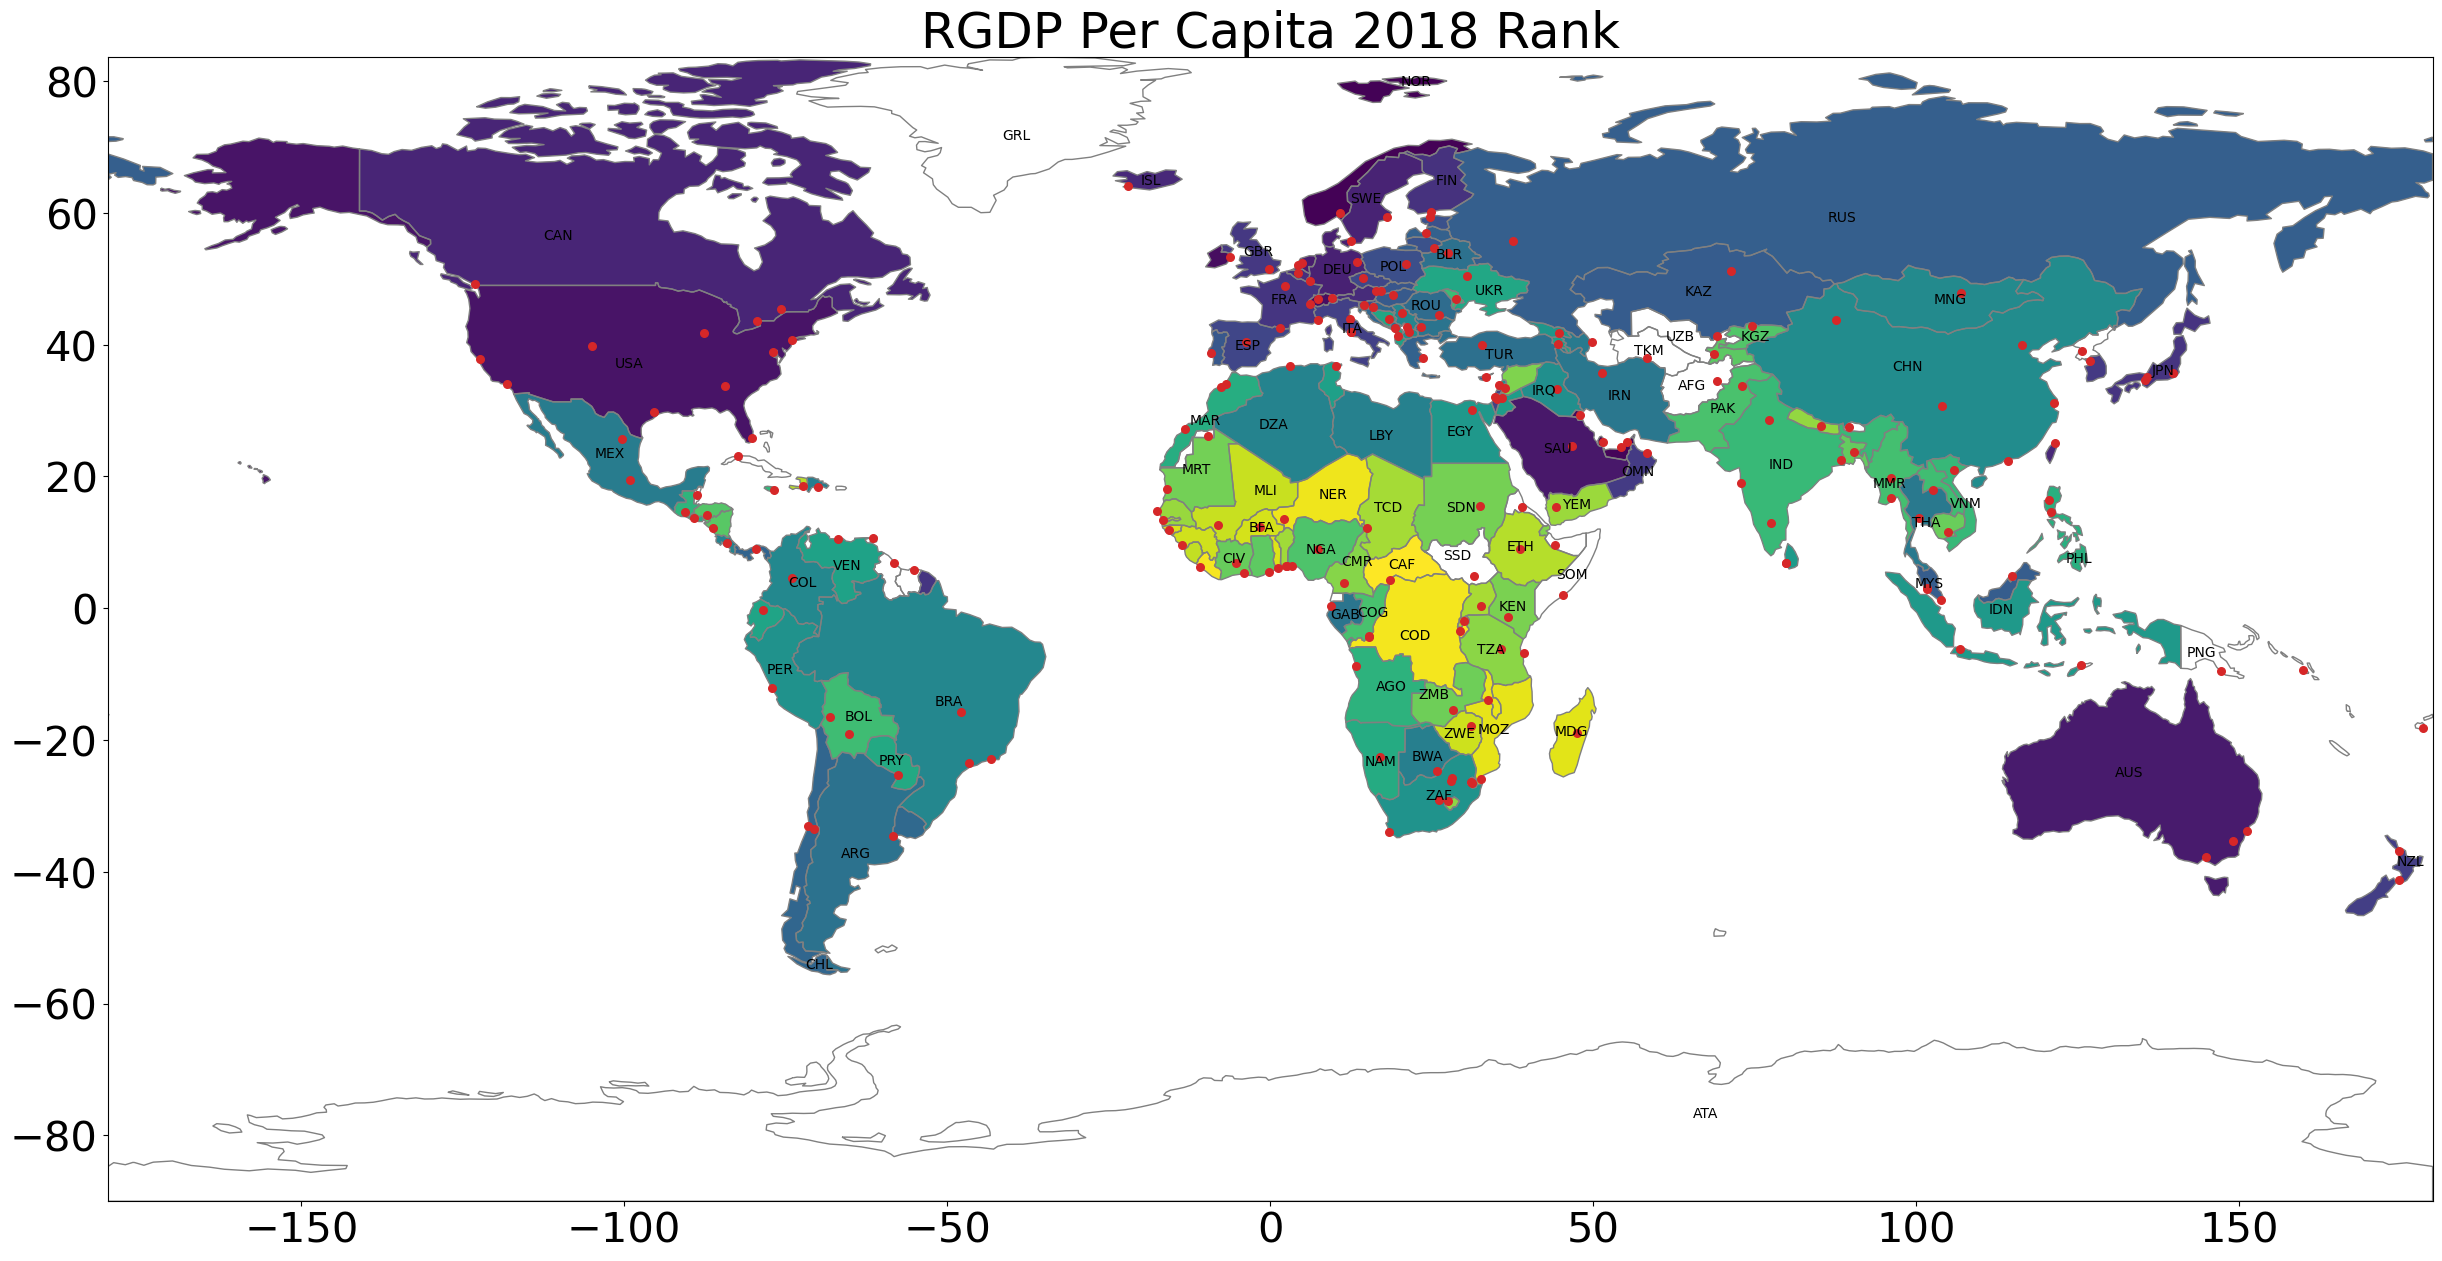

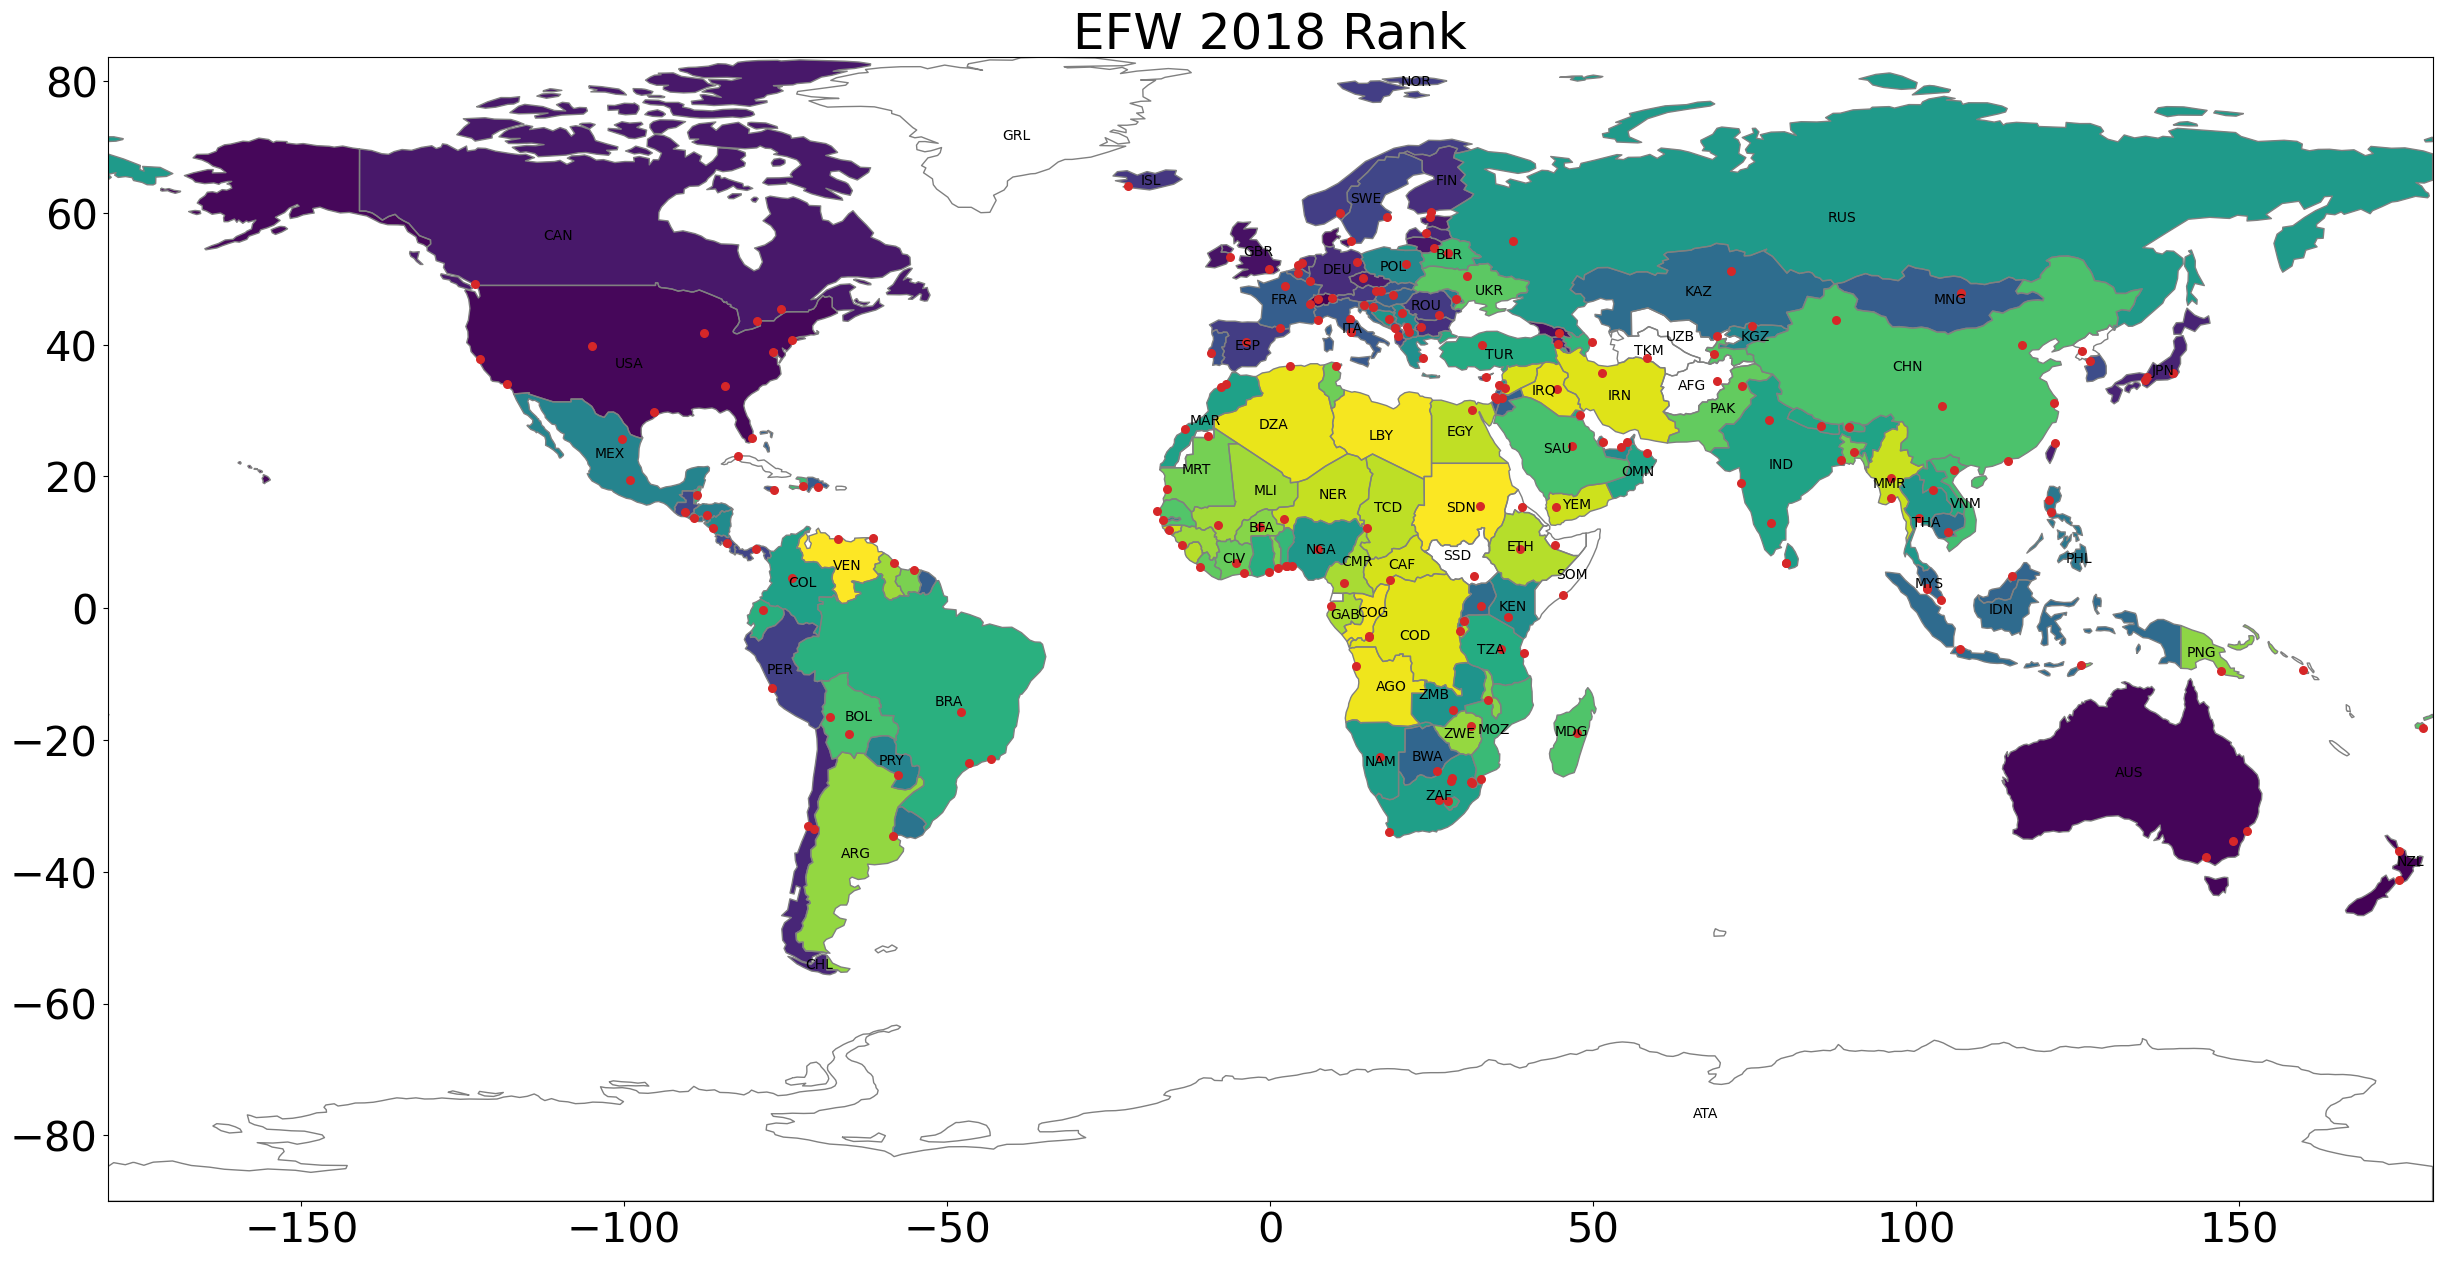

In [54]:
def show_country_name(world, ax):
    area = world.area

    for iso in world.index:
    #only plot ISO name if country is bigger than ISL
        if area[iso] >= area["ISL"]:
            centroid = world.loc[iso]["geometry"].representative_point()
            x,y = centroid.x, centroid.y
            ax.text(x, y, iso, va = "center", ha = "center", fontsize = 10)
savefig = True           
#Compare rank of real gdp per capita and econmic freedom
for column in ["RGDP Per Capita 2018 Rank", "EFW 2018 Rank"]:
    fig, ax = plt.subplots(figsize = (30,20))
#We can plot in layers and 1st layer plot the colors of the variable
    world.plot(column = column, ax = ax)
#second layer plot the boundaries
    world.plot(facecolor="none", edgecolor="grey", ax = ax)
    ax.set_title(column)
#only plot cities that are associated witha  country from the world df
    cities[cities["Country"]!=""].plot(color = "C3", 
                                       markersize = 30, 
                                       ax = ax)
    
    show_country_name(world, ax)
    if savefig == True:
        plt.savefig(f"{column}.png")